<!DOCTYPE html>
<html>
<body>

<h1 style="text-align: center; font-family: Times New Roman; margin-bottom: 0;">M<span style="font-size: x-large;">AGNETIC</span> M<span style="font-size: x-large;">ETHODS</span> L<span style="font-size: x-large;">AB</span> (GPC522)</h1>

<h2 style="text-align: center; font-family: Times New Roman; margin-top: 0;"><sup style="font-size: larger;">PRACTICAL - IV</sup> </h2>

<h3 style="text-align: center; font-family: Times New Roman; margin-top: 0;"><sup style="font-size: larger; font-weight: bold;">Magnetic Data Processing I</sup> </h3>

<h4 style="text-align: center; font-family: 'Courier New'; margin-bottom: 0;">February 5, 2024</h4>
<h4 style="text-align: center; font-family: 'Courier New'; margin-bottom: 0;">Name: Riya Singh Rathore</h4>
<h4 style="text-align: center; font-family: 'Courier New';">Admission Number: 20JE0801</h4>
<h4 style="text-align: center; font-family: 'Times New Roman';">Visit: <a href="https://github.com/RiyaSinghRathore/Magnetic-Methods";">https://github.com/RiyaSinghRathore/Magnetic-Methods</a> for the Lab Repository</h4>
</body>
</html>

#### Objective:

**a)** Process the raw data by applying necessary corrections.

**b)** Plot the Diurnal curve for the entire period of the survey.

**c)** Plot the raw magnetic data and processed magnetic data. Discuss the likely geologic sources of the fluctuations in the total field magnetic anomaly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyIGRF

In [2]:
# Base Magnetometer Readings
data1 = {
    'Time': ['08:56:59 AM', 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155],
    'Reading': [48512.75, 48512.58, 48512.49, 48512.65, 48516.97, 48513.29, 48515.77, 48516.68, 48517.12, 48520.73, 48515.25, 48518.35, 48512.31, 48512.21, 48512.35, 48512.49, 48512.09, 48512.88, 48513.57, 48513.97, 48513.49, 48513.37, 48513.64, 48512.88, 48514.61, 48515.17, 48514.24, 48513.54, 48511.55, 48513.46, 48512.56, 48512.7],
}

In [3]:
# Magnetometer Readings
df1 = pd.DataFrame(data1)
df1

,Time,Reading
0,08:56:59 AM,48512.75
1,5,48512.58
2,10,48512.49
3,15,48512.65
4,20,48516.97
5,25,48513.29
6,30,48515.77
7,35,48516.68
8,40,48517.12
9,45,48520.73


In [4]:
# Magnetometer Reading
data2 = {
    'Station': ['Base', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 'Base'],
    'Time': ['8:00', '8:10', '8:20', '8:30', '8:40', '8:50', '9:00', '9:10', '9:20', '9:30', '9:40', '9:50', '9:60', '10:10', '10:20', '10:30', '10:40', '10:50', '11:00', '11:10', '11:20', '11:30', '11:40', '11:50', '12:00', '12:30'],
    'Longitude': [None, 76.2751, 76.276, 76.277, 76.27775, 76.27875, 76.2797, 76.28075, 76.2817, 76.2837, 76.28475, 76.2858, 76.2867, 76.2877, 76.2887, 76.2897, 76.29075, 76.2917, 76.2927, 76.2937, 76.29475, 76.29575, 76.2967, 76.29775, 76.29875, None],
    'Latitude': [None, 27.36647, 27.3662, 27.36611, 27.36602, 27.36586, 27.3656, 27.3655, 27.365305, 27.364972, 27.364805, 27.364638, 27.36447, 27.36427, 27.36411, 27.36394, 27.36377, 27.36361, 27.36338, 27.36327, 27.36308, 27.36291, 27.36277, 27.36258, 27.36241, None],
    'Reading': [47217.73, 47289.25, 47311.38, 47328.11, 47333.13, 47327.16, 47290.79, 47286.93, 47278.15, 47302.61, 47311.65, 47309.25, 47383.11, 47287.73, 47272.13, 47276.19, 47270.64, 47275.67, 47284.21, 47288.37, 47311.97, 47281.7, 47309.33, 47288.94, 47296.3, 47229.37]
}


In [5]:
df2 = pd.DataFrame(data2)
df2

,Station,Time,Longitude,Latitude,Reading
0,Base,8:00,NaN,NaN,47217.73
1,1,8:10,76.27510,27.366470,47289.25
2,2,8:20,76.27600,27.366200,47311.38
3,3,8:30,76.27700,27.366110,47328.11
4,4,8:40,76.27775,27.366020,47333.13
5,5,8:50,76.27875,27.365860,47327.16
6,6,9:00,76.27970,27.365600,47290.79
7,7,9:10,76.28075,27.365500,47286.93
8,8,9:20,76.28170,27.365305,47278.15
9,9,9:30,76.28370,27.364972,47302.61


In [6]:
df1.loc[0, 'Time'] = 0
df1['Time'] = df1['Time'].astype(int)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     32 non-null     int64  
 1   Reading  32 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 644.0 bytes
None


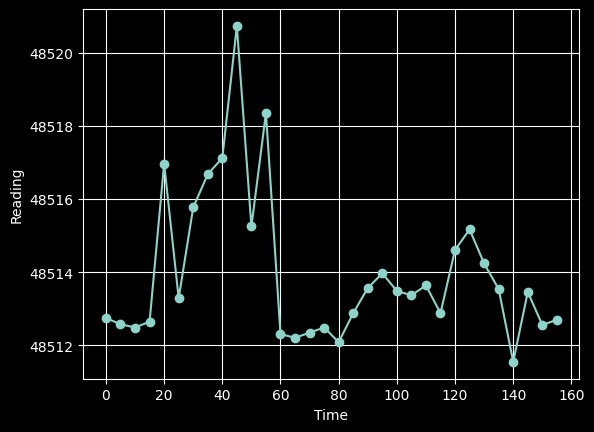

In [23]:
plt.plot(df1['Time'], df1['Reading'], marker='o')
plt.xlabel('Time')
plt.ylabel('Reading')
plt.grid()

In [17]:
df1['Reading_diff'] = df1['Reading'].diff()
df1['Diurnal_rate'] = df1['Reading_diff'] / 5
rate = df1.iloc[::2]['Diurnal_rate']
rate

0       NaN
2    -0.018
4     0.864
6     0.496
8     0.088
10   -1.096
12   -1.208
14    0.028
16   -0.080
18    0.138
20   -0.096
22    0.054
24    0.346
26   -0.186
28   -0.398
30   -0.180
Name: Diurnal_rate, dtype: float64

In [9]:
lat=np.array(df2.Latitude)
lon=np.array(df2.Longitude)
igrf=[ ]
for i in np.arange(1,25):
    k=pyIGRF.igrf_value(float(lat[i]),float(lon[i]),0, 2019)
    igrf.append(k)

In [10]:
igrf1=[0]*24
for j in range(24):
    igrf1[j]=igrf[j][-1]

In [11]:
igrf1.insert(0,0)
igrf1.insert(25,0)

In [12]:
df2["IGRF"]=igrf1

In [13]:
rt=(df2.Reading[0]-df2.Reading[25])/270
k=[rt,rt,rt,rt,rt]
rate=np.insert(rate,0,k);
print( 'diurnal rate:\n','\n',rate)

diurnal rate:
 
 [-0.04311111 -0.04311111 -0.04311111 -0.04311111 -0.04311111         nan
 -0.018       0.864       0.496       0.088      -1.096      -1.208
  0.028      -0.08        0.138      -0.096       0.054       0.346
 -0.186      -0.398      -0.18      ]


In [28]:
# Calculate anomaly
df2['Anomaly'] = df2.iloc[:, 5] - df2.iloc[:, 6] 
df2.iloc[:, -1] = 0
df2.iloc[25, -1] = 0
df2

,Station,Time,Longitude,Latitude,Reading,IGRF,Anomaly
0,Base,8:00,NaN,NaN,47217.73,0.000000,0.0
1,1,8:10,76.27510,27.366470,47289.25,47592.082435,0.0
2,2,8:20,76.27600,27.366200,47311.38,47592.038861,0.0
3,3,8:30,76.27700,27.366110,47328.11,47592.100451,0.0
4,4,8:40,76.27775,27.366020,47333.13,47592.134855,0.0
5,5,8:50,76.27875,27.365860,47327.16,47592.159772,0.0
6,6,9:00,76.27970,27.365600,47290.79,47592.126864,0.0
7,7,9:10,76.28075,27.365500,47286.93,47592.188643,0.0
8,8,9:20,76.28170,27.365305,47278.15,47592.189780,0.0
9,9,9:30,76.28370,27.364972,47302.61,47592.232781,0.0


### Conclusions:
There is one anomalous zone observed clearly between 0 to 0.6 km and a spike kind of zone at
around 1.2-1.3 km. But the clear anomaly can be seen between 0 to 0.6 km, after that the plot is
ambiguous to interpret.